In [1]:
import pandas as pd
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',decimal=",")
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [2]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# 1) Add a column for hour of the day
df['hour'] = df['date'].dt.hour

# 2) Add a column for day of the week in numbers (1 = Sunday, 7 = Saturday)
df['day_of_week'] = df['date'].dt.dayofweek + 1  # pandas dayofweek starts with Monday=0

# 3) Add a column that tells you what month it is
df['month'] = df['date'].dt.month

# 4) Add a column that indicates if the day is a weekend or not
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [6, 7] else 0)

# 5) Add a column that includes the date but not the time
df['only_date'] = df['date'].dt.date

# Delete the original 'date' column
df.drop('date', axis=1, inplace=True)

# Reorder columns to place the new columns to the left
cols_order = ['hour', 'day_of_week', 'month', 'is_weekend', 'only_date'] + [col for col in df if col not in ['hour', 'day_of_week', 'month', 'is_weekend', 'only_date']]
df = df[cols_order]

# Display the modified dataframe with reordered columns
df.head()

,hour,day_of_week,month,is_weekend,only_date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,1,5,3,0,2017-03-10,55.2,16.98,3019.53,557.434,395.713,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,1,5,3,0,2017-03-10,55.2,16.98,3024.41,563.965,397.383,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,1,5,3,0,2017-03-10,55.2,16.98,3043.46,568.054,399.668,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,1,5,3,0,2017-03-10,55.2,16.98,3047.36,568.665,397.939,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,1,5,3,0,2017-03-10,55.2,16.98,3033.69,558.167,400.254,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [3]:
import sqlite3
import matplotlib.pyplot as plt

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Write the dataframe to the SQLite database
df.to_sql('flotation_data', conn, index=False)

# Query the average % Silica and average % Iron for each hour of the day
query = """
SELECT hour, AVG(`% Silica Concentrate`) AS avg_silica, AVG(`% Iron Concentrate`) AS avg_iron
FROM flotation_data
GROUP BY hour
ORDER BY hour
"""

result = pd.read_sql(query, conn)

# Close the SQLite connection
conn.close()




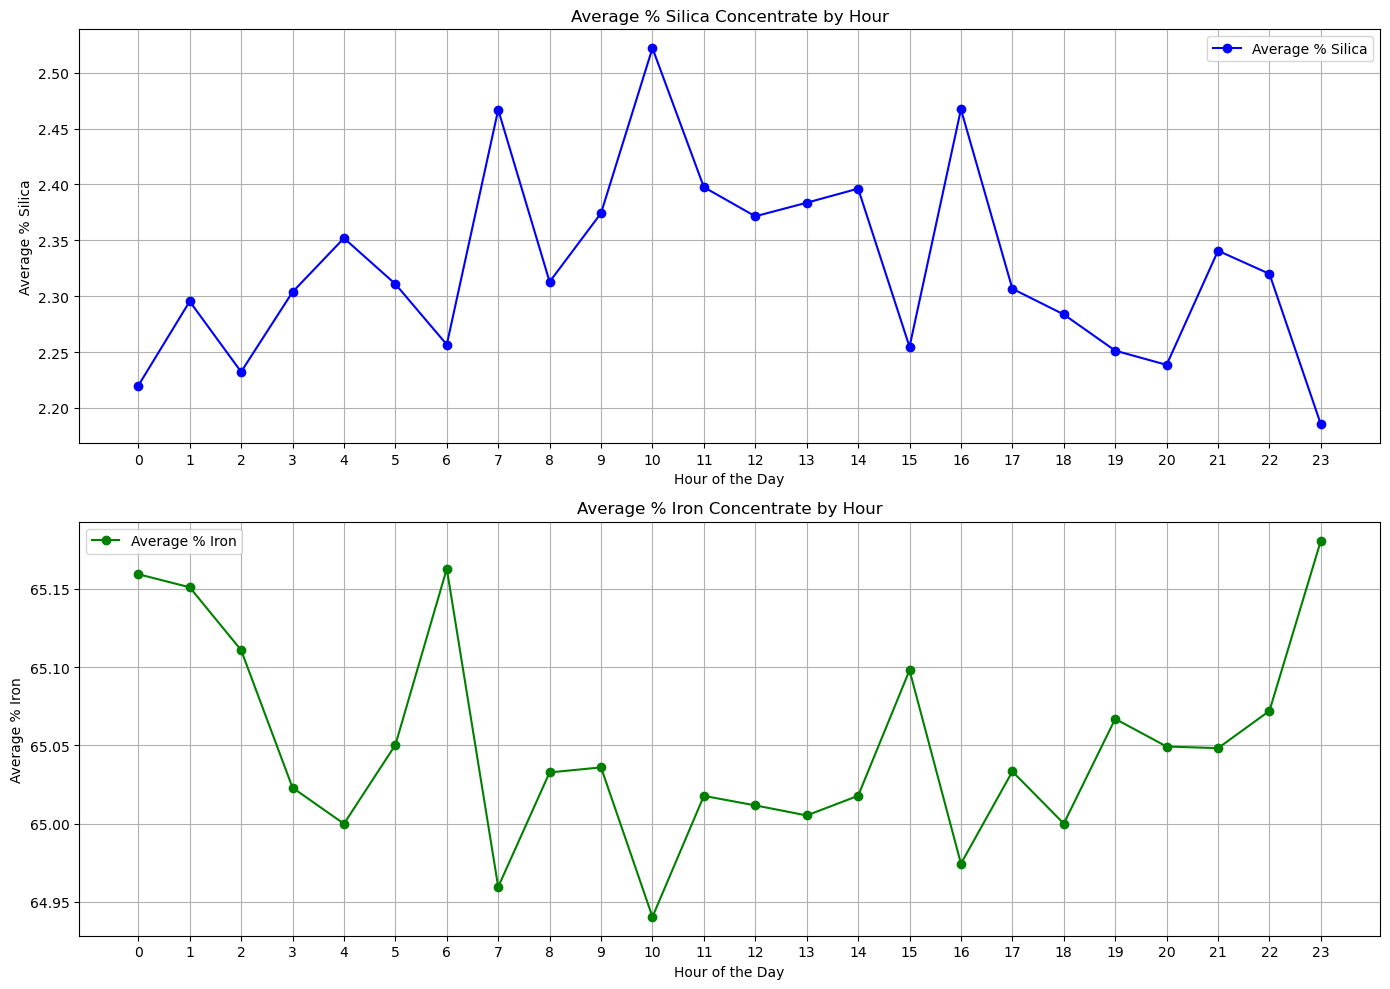

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Plotting Average % Silica by Hour
axes[0].plot(result['hour'], result['avg_silica'], label='Average % Silica', marker='o', color='blue')
axes[0].set_title('Average % Silica Concentrate by Hour')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average % Silica')
axes[0].set_xticks(result['hour'])
axes[0].legend()
axes[0].grid(True)

# Plotting Average % Iron by Hour
axes[1].plot(result['hour'], result['avg_iron'], label='Average % Iron', marker='o', color='green')
axes[1].set_title('Average % Iron Concentrate by Hour')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average % Iron')
axes[1].set_xticks(result['hour'])
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

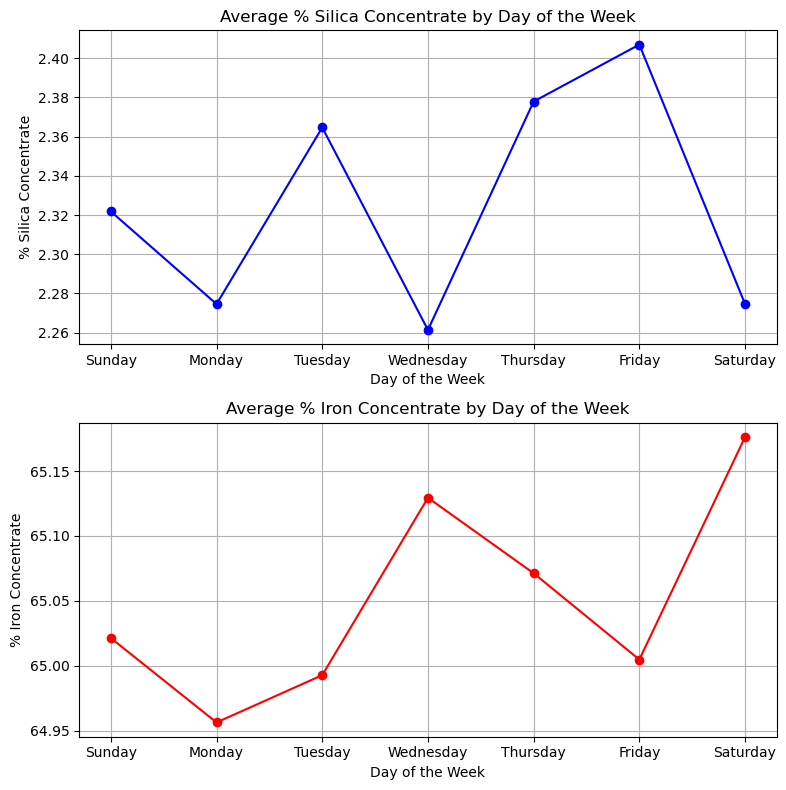

In [5]:
# Create an in-memory SQLite database again
conn = sqlite3.connect(":memory:")

# Write the dataframe to the SQLite database
df.to_sql('flotation_data', conn, index=False)

# Query the average % Silica and average % Iron for each day of the week
query_week = """
SELECT day_of_week, AVG(`% Silica Concentrate`) AS avg_silica, AVG(`% Iron Concentrate`) AS avg_iron
FROM flotation_data
GROUP BY day_of_week
ORDER BY day_of_week
"""

result_week = pd.read_sql(query_week, conn)

# Close the SQLite connection
conn.close()

# Plotting the results for days of the week
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Day names for x-ticks
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Plot for average % Silica
axes[0].plot(days, result_week['avg_silica'], marker='o', color='blue')
axes[0].set_title("Average % Silica Concentrate by Day of the Week")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("% Silica Concentrate")
axes[0].grid(True)

# Plot for average % Iron
axes[1].plot(days, result_week['avg_iron'], marker='o', color='red')
axes[1].set_title("Average % Iron Concentrate by Day of the Week")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("% Iron Concentrate")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [6]:
import sqlite3
import pandas as pd

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Insert the dataframe into the SQLite database
df.to_sql('flotation_data', conn, if_exists='replace', index=False)

# Define the SQL query
sql = """
SELECT 
    AVG(DistinctCount) as AverageDistinctValues
FROM
    (SELECT 
         only_date, 
         COUNT(DISTINCT "{column_name}") as DistinctCount
     FROM flotation_data 
     GROUP BY only_date)
"""

# Execute the query for each column (excluding date/time features) and store the results
results = {}
columns_to_exclude = ['hour', 'day_of_week', 'month', 'is_weekend', 'only_date']
for column in df.columns:
    if column not in columns_to_exclude:
        cursor.execute(sql.format(column_name=column))
        results[column] = cursor.fetchone()[0]

# Close the cursor and connection
cursor.close()
conn.close()

results


{'% Iron Feed': 2.7732558139534884,
 '% Silica Feed': 2.7674418604651163,
 'Starch Flow': 4137.8488372093025,
 'Amina Flow': 4030.1279069767443,
 'Ore Pulp Flow': 3700.889534883721,
 'Ore Pulp pH': 3776.360465116279,
 'Ore Pulp Density': 3600.3720930232557,
 'Flotation Column 01 Air Flow': 2182.5697674418607,
 'Flotation Column 02 Air Flow': 3483.703488372093,
 'Flotation Column 03 Air Flow': 2640.8720930232557,
 'Flotation Column 04 Air Flow': 2592.767441860465,
 'Flotation Column 05 Air Flow': 2955.796511627907,
 'Flotation Column 06 Air Flow': 3092.796511627907,
 'Flotation Column 07 Air Flow': 3134.2558139534885,
 'Flotation Column 01 Level': 3876.1046511627906,
 'Flotation Column 02 Level': 4014.343023255814,
 'Flotation Column 03 Level': 3949.1046511627906,
 'Flotation Column 04 Level': 4141.063953488372,
 'Flotation Column 05 Level': 4050.4418604651164,
 'Flotation Column 06 Level': 4056.093023255814,
 'Flotation Column 07 Level': 4095.982558139535,
 '% Iron Concentrate': 245.37

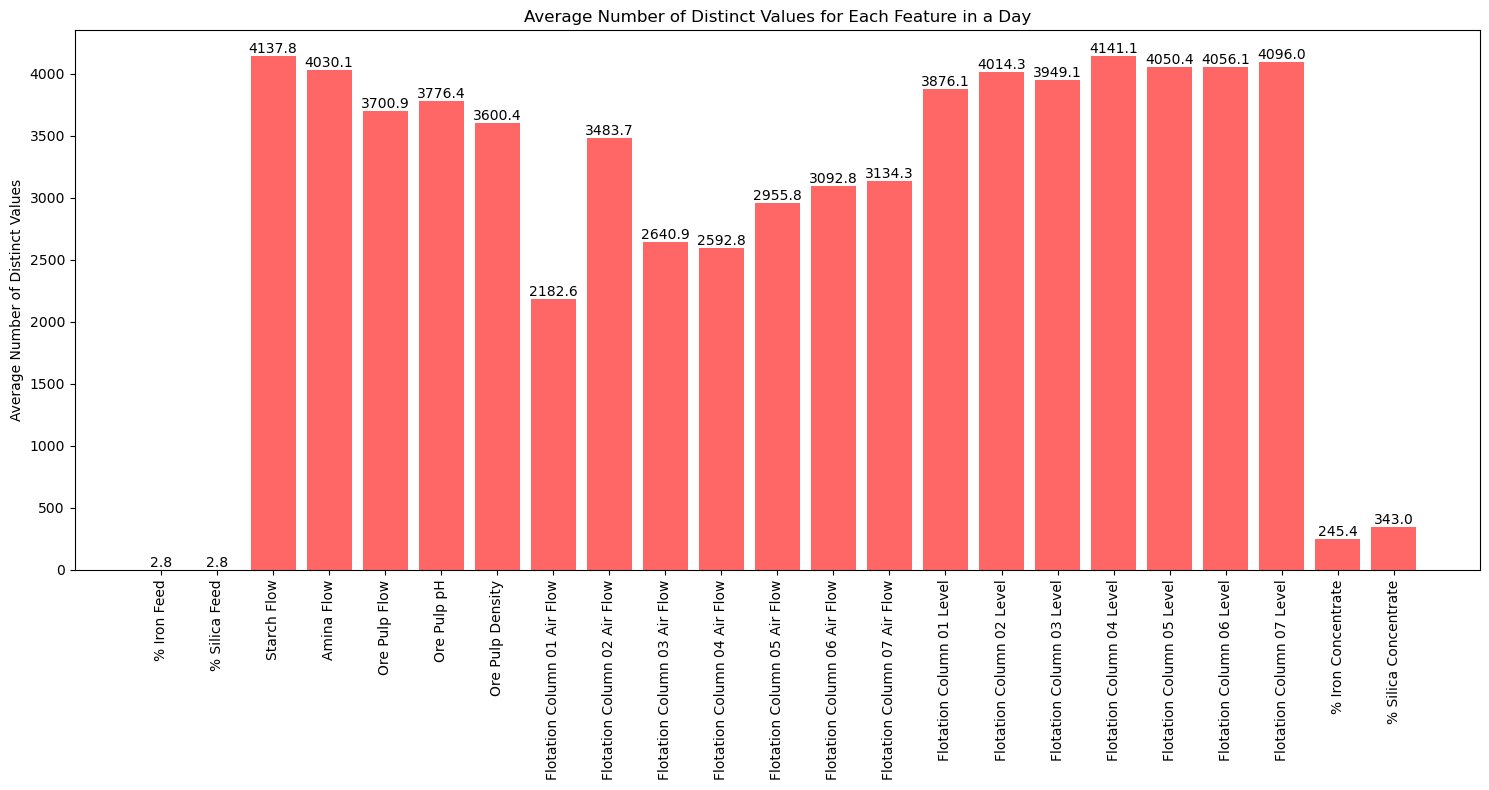

In [7]:
# Visualize the results
plt.figure(figsize=(15, 8))
bars = plt.bar(results.keys(), results.values(), color='red', alpha=0.6)

# Add the actual value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 1), ha='center', va='bottom', rotation=0, color='black')

plt.xticks(rotation=90)
plt.ylabel('Average Number of Distinct Values')
plt.title('Average Number of Distinct Values for Each Feature in a Day')
plt.tight_layout()
plt.show()

In [8]:
df_values_only = df.drop(columns=['hour', 'day_of_week', 'month', 'is_weekend', 'only_date'])

df_values_only.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


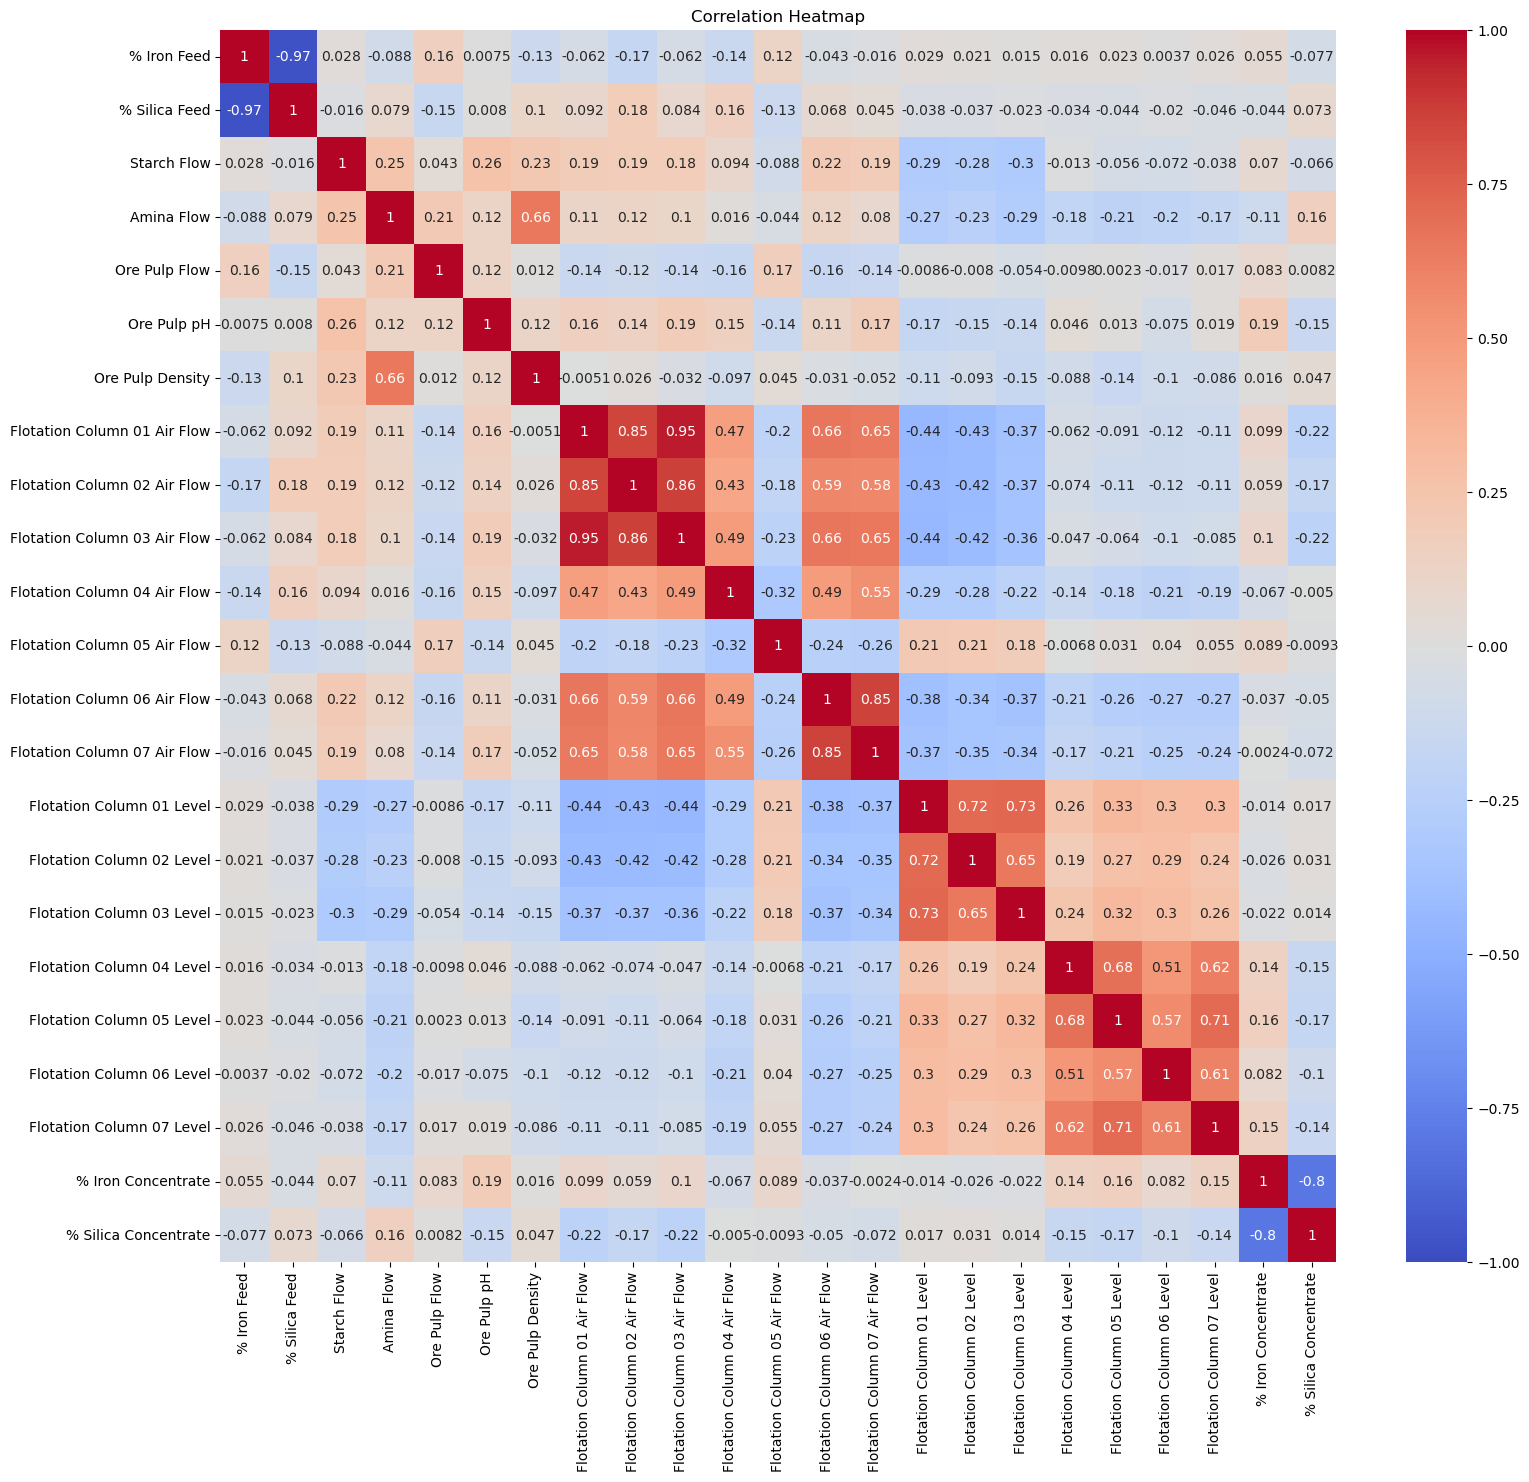

In [9]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df_values_only.corr()

# Plot the heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Splitting data into inputs (X) and outputs (y)
X = df_values_only.drop(columns=['% Iron Concentrate', '% Silica Concentrate'])
y = df_values_only[['% Iron Concentrate', '% Silica Concentrate']]

# Splitting data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((589962, 21), (147491, 21), (589962, 2), (147491, 2))

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=42)


# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error for each output
mse_iron = mean_squared_error(y_test['% Iron Concentrate'], y_pred[:, 0])
mse_silica = mean_squared_error(y_test['% Silica Concentrate'], y_pred[:, 1])

# Calculate the R2 scores for each output on the sampled data
r2_iron = r2_score(y_test['% Iron Concentrate'], y_pred[:, 0])
r2_silica = r2_score(y_test['% Silica Concentrate'], y_pred[:, 1])

mse_iron, mse_silica, r2_iron, r2_silica
print("MSE iron:", mse_iron)
print("MSE silica:", mse_silica)
print("R2 iron:", r2_iron)
print("R2 silica:", r2_silica)

MSE iron: 0.04238187206017949
MSE silica: 0.04277235228583643
R2 iron: 0.966036383564287
R2 silica: 0.9661563706544567
